In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
train=pd.read_csv('insurance.csv')

In [22]:
train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


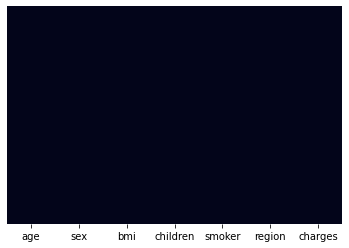

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

this data is clean we dirrectly go to model

In [0]:
cat_features=[i for i in train.columns if train.dtypes[i]=='object'] 

In [25]:
cat_features

['sex', 'smoker', 'region']

In [0]:
def category_onehot_multcols(multcolumns):
    df_final=train
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(train[fields],drop_first=True)
        
        train.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([train,df_final],axis=1)
        
    return df_final

In [27]:
train1=category_onehot_multcols(cat_features)

sex
smoker
region


In [28]:
train1

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = train1.drop(['charges'], axis = 1)
y = train1.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7958771892269201
